In [1]:
using Revise
using Cosmology
using PyPlot
using PyCall
using BenchmarkTools
@pyimport camb

In [2]:
cp = camb.set_params(H0=67,ombh2=0.0225,omch2=0.12,mnu=0,nnu=0,ns=1,As=1e-9,Want_CMB=false,Want_CMB_lensing=false,DoLensing=false,WantCls=false,WantScalars=false,Want_cl_2D_array=false)
cp[:set_matter_power]()
res = camb.get_results(cp)
derived = res[:get_derived_params]();
kh,_,mpk = res[:get_matter_power_spectrum]();

In [3]:
𝕡 = new_params(Nν_massive=0,Nν_massless=0,mν=0,ωb=0.0225,ωc=0.12,H0=67);

In [4]:
keq = 1/(Cosmology.η(𝕡,(𝕡.ρb₀ + 𝕡.ρc₀)/𝕡.ργ₀,Inf)/Mpc)

0.01153960076446327

In [5]:
ks = 10 .^ range(log10(1e-4/Mpc), log10(1e0/Mpc), length=100)
zs = 10 .^ range(6.8, 0, length=1000);

In [6]:
soln = @btime solve_boltz(𝕡,ks);

  84.543 ms (2310589 allocations: 177.88 MiB)


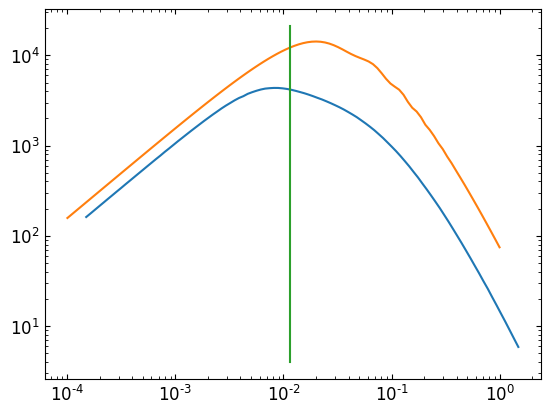

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1e66ae3be0>

In [7]:
loglog(ks*Mpc/0.67, ks .* [s(0).ϕ^2*Mpc*8e5 for s in soln])
loglog(kh,mpk[1,:]')
plot(fill(keq,2),ylim())

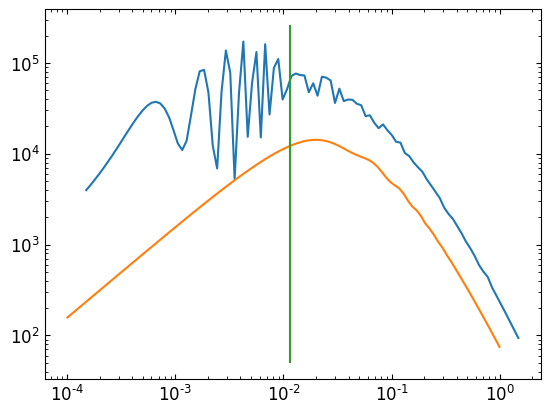

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1e4a822a90>

In [8]:
loglog(ks*Mpc/0.67, ks .* [s(0).δγ^2*Mpc*8e5 for s in soln])
loglog(kh,mpk[1,:]')
plot(fill(keq,2),ylim())

In [9]:
ηs = map(z->Cosmology.η(𝕡,z),zs);

In [10]:
ks[62]*Mpc

0.02915053062825149

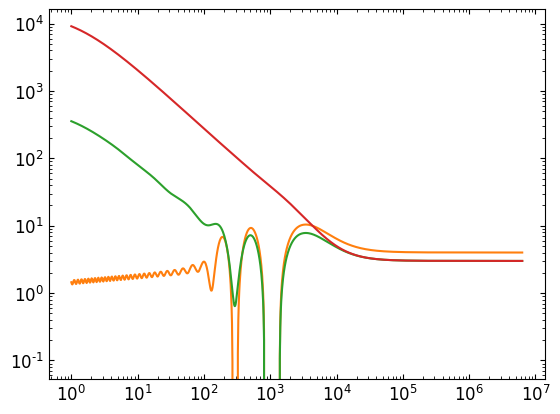

0.03199267137797362


In [11]:
i=63

println(ks[i]*Mpc)

for x in [:ϕ,:δγ,:δb,:δc]
    plot(zs, getindex.(soln[i](@. log(1/(1+zs))).u, x))
end

# zenter = Cosmology.brentq(z->1/Cosmology.η(p,z,Inf)-ks[i],1e0,1e7)
# plot(fill(1/(1+zenter),2),ylim(),c="k",ls=":")

# ylim(-20,20)
yscale("log")
xscale("log")